<a id='top'></a>

# CSCI 3202, Spring 2018
# Assignment 4
# Due:  Wednesday 21 March 2018 by 12:00 PM

<br>

### Your name: Brennon Lee

<br>

**Note:** Some packages to load, helper functions and unit tests are defined at [the bottom of this notebook](#helpers)

Shortcuts:  [top](#top) || [1](#p1) | [1a](#p1a) | [1b](#p1b) | [1c](#p1c) | [1d](#p1d) | [1e](#p1e) | [1f](#p1f) | [1g](#p1g) | [1h](#p1h) || [2](#p2) | [2a](#p2a) | [2b](#p2b) | [2c](#p2c) | [2d](#p2d) | [2e](#p2e) || [3](#p3) | [3a](#p3a) | [3b](#p3b) | [3c](#p3c) | [3d](#p3d) | [3e](#p3e) || [helpers](#helpers)

**Before you begin:** You will also need to download a few data sets from the Piazza page, under the Resources tab.
1. data_sealevel.csv
1. data_temperature.csv
1. data_socks.csv

---

<a id='p1'></a>[Back to top](#top)

## Problem 1:  Calibrating a model for global mean sea level changes

<img src="http://www.anthropocenemagazine.org/wp-content/uploads/2017/05/future-sea-levels.jpg" width="250">

<a id='p1a'></a>

### (1a) Load and plot some data.

Let's load a couple data sets.  One is a data set of global mean sea levels, and the other is a data set of global mean temperatures:
* `sealevel` will be a list of global mean sea levels (millimeters)
* `sealevel_sigma` will be a list of the *uncertainty* in global mean sea levels (millimeters), and
* `temperature` will be a list of global mean temperatures (degrees Celsius).

Note that depending on where you save these CSV data files, you may need to change the file names below in the `pd.read_csv` function calls to reflect the proper paths.

In [17]:
year = []
sealevel = []
sealevel_sigma = []
temperature = []

dfSealevel = pd.read_csv("hw4_data/data_sealevel.csv")
dfTemperature = pd.read_csv("hw4_data/data_temperature.csv")

# We aren't doing any heavy-duty stats stuff, so let's just keep what we need as regular lists
year = dfSealevel["year"].tolist()
sealevel = dfSealevel["sealevel"].tolist()
sealevel_sigma = dfSealevel["uncertainty"].tolist()
temperature = dfTemperature["temperature"].tolist()

**Check** to make sure (1) temperature, year and sea level time series are all the same length and period; (2) data need to be properly *normalized* against some reference period. In climate science, often the years 1961-1990 are used as the reference period.  So conduct a check to make sure that the mean sea level and mean global mean temperature for the 1961-1990 (inclusive) period are both 0.

In [18]:
assert(len(temperature) == len(sealevel) == len(sealevel_sigma))

y1961 = year.index(1961)
y1991 = year.index(1991)
y1992 = year.index(1992)

mean_sealevel = np.mean(sealevel[y1961: y1991])
mean_global_temp = np.mean(temperature[y1961: y1991])

print('mean sea level is ', mean_sealevel, 'and mean global temp is: ', mean_global_temp)

mean sea level is  -0.003333333333333736 and mean global temp is:  -3.333333333332411e-05


Plot the data points as a scatter plots, and plot them side-by-side-by-side (one row, three columns of figures). The point here is learn how to customize your figures a bit more, and also because computer screens are (typically) wider than they are tall.

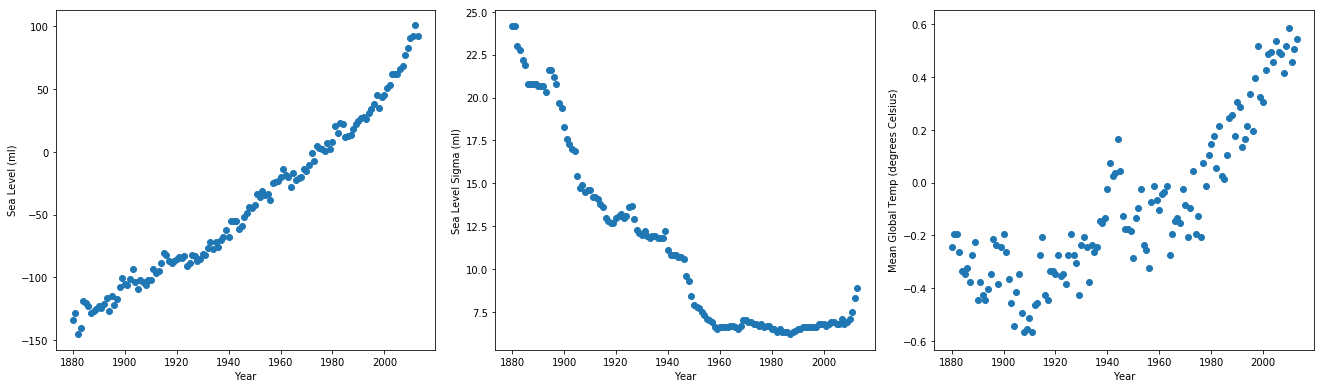

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18.5, 5.5)
fig.subplots_adjust(hspace=0.9, wspace=0.9)
ax[0].scatter(year, sealevel)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Sea Level (ml)')
ax[1].scatter(year, sealevel_sigma)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Sea Level Sigma (ml)')
ax[2].scatter(year, temperature)
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Mean Global Temp (degrees Celsius)')
plt.tight_layout()
plt.show()

**Question:** How does the uncertainty in global mean sea levels change as a function of time?  When is the uncertainty the highest?  Give one reason why you think this might be the case.

**Your answer:**

###### As a function of time, the uncertatinty in global mean sea levels drastically decrease with the uncertainty being its highest at 1880. The reasons for the decrease is most likely surronding the increase in our modern technology and ability to take more accurate measurements over time.

<br>

<a id='p1b'></a>

### (1b)  The "out-of-box" sea-level model

In your plot from **(1a)**, you should see quite an apparent relationship between increasing temperatures and rising sea levels.  Seeems like someone should try to model the relationship between those two, huh?

In the [helper functions below](#helpers), a simple model for temperature-driven changes in global mean sea level (GMSL) is defined. This is the model of [Rahmstorf (2007)](http://science.sciencemag.org/content/315/5810/368).

The `slr` model takes two parameters, $\alpha$ and $T_{eq}$, and requires a time series of global mean temperatures: `slr(alpha, Teq, temperature)`.
* `alpha` is the sensitivity of sea-level changes to changes in global temperature. The units for $\alpha$ are millimeters of sea-level changes per year, or mm y$^{-1}$.
* `Teq` is the equilibrium global mean temperature, with units of degrees Celsius.
* `temperature` is the time series of global mean surface temperatures, assumed to be relative to the 1961-1990 mean. We read a temperature data set above, which we will use for this input.

For now, you do not need to worry too much about how this model works.  It is very simple, and widely used, but the point here is that you can plug in a particular set of temperatures (the model **forcing**) and parameters ($\alpha$ and $T_{eq}$), and out pops a time series of simulated global mean sea levels.

**Our goal:**  pick good values for $\alpha$ and $T_{eq}$, so that when we run the `slr` model using the observations of temperature (which we plotted above), the model output matches well the observations of global mean sea level (which we also plotted above).

The whole process of figuring out what these good parameter values are is called **model calibration**, and it's awesome.  Let's have a look at why we need to do any calibration in the first place, shall we?

The default parameter choices given in the Rahmstorf (2007) paper are $\alpha=3.4$ mm y$^{-1}$ and $T_{eq} = -0.5\ ^{\circ}$C.

Make a plot that contains:
* the observed sea level data as scatter points
* the modeled sea levels as a line, using the temperature observations from above as the `temperature` input
* an appropriate legend and axis labels
* $x$ axis is years
* $y$ axis is sea level

Note that after you run the `slr` model, you will need to **normalize** the output relative to the 1961-1990 reference period.  That is because you are going to compare it against data that is also normalized against this reference period. The `years` that correspond to the model output should be the same as the `years` that correspond to the `temperature` input.

normalized slr outputs: -3.552713678800501e-15


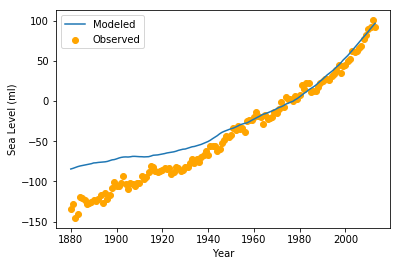

In [20]:
slr_outputs = slr(3.4, -0.5, temperature)
slr_mean = np.mean(slr_outputs[y1961: y1991])

norm_sealevels = [ level - mean_sealevel for level in sealevel]
norm_slr_outputs= [slr - slr_mean for slr in slr_outputs]

print('normalized slr outputs:', np.mean(norm_slr_outputs[y1961: y1991]))

plt.scatter(year, norm_sealevels, color='Orange' , label='Observed')
plt.plot(year, norm_slr_outputs, label='Modeled')
plt.xlabel('Year')
plt.ylabel('Sea Level (ml)')
plt.legend()
plt.show()

Your plot above ought to show decent match for the late 1900s, but diverge a bit further back in time.

**The point:**  We can do better than this "out-of-the-box" version of the Rahmstorf sea level model.

<br>

<a/ id='p1c'></a>

### (1c)   Figuring out our objective function

As our **objective function**, we will use the joint likelihood function of the observed sea level data, given the model simulation.  For a single data point $y_i$ in year $i$, with associated uncertainty $\sigma_i$, we can assume the likelihood for our model simulation in year $i$, $\eta_i$, follows a normal distribution centered at the data point ($y_i$) and with standard deviation given by the associated uncertainty ($\sigma_i$).  The model simulation is a **deterministic** result of our parameter choices $\alpha$ and $T_{eq}$, so we write the likelihood as:

$$L(y_i \mid \alpha, T_{eq}) = \dfrac{1}{\sqrt{2 \pi} \sigma_i} e^{-\dfrac{(\eta_i(\alpha, T_{eq}) - y_i)^2}{2\sigma_i^2}}$$

But that only uses a single data point.  Let's use all the data!  The **joint likelihood** is the product of all of the likelihoods associated with the individual data points.

$$L(\mathbf{y} \mid \alpha, T_{eq}) = \prod_{i=1}^N L(y_i \mid \alpha, T_{eq})$$

However, this joint likelihood is the product of a lot of numbers that are less than 1, so it will be **tiny**.  Instead, we should try to optimize the **joint log-likelihood**, which is simply the (natural) logarithm of the joint likelihood function.

$$l(\mathbf{y} \mid \alpha, T_{eq}) = \log{(L(y \mid \alpha, T_{eq}))}$$

**Show** (using math) that if we assume the observational data ($y_i$) are all independent, then the joint log-likelihood is:

$$l(\mathbf{y} \mid \alpha, T_{eq}) =  -\dfrac{N}{2} \log{(2\pi)} - \sum_{i=1}^N \log{(\sigma_i)} - \dfrac{1}{2}\sum_{i=1}^N \left( \dfrac{\eta_i(\alpha, T_{eq}) - y_i}{\sigma_i} \right)^2$$

where, $\mathbf{y} = [y_1, y_2, \ldots, y_N]$ is the entire vector (list) of sea level observations, $\eta(\alpha, T_{eq}) = [\eta_1(\alpha, T_{eq}), \eta_2(\alpha, T_{eq}), \ldots, \eta_N(\alpha, T_{eq})]$ is the entire vector (list) of `slr` model output when the parameter values $\alpha$ and $T_{eq}$ are used, and $N$ is the number of observations we have.

**Note:** Yes, I'm mixing the typical indexing of $1-N$ with what you'll need to implement, which is the Pythonic $0-(N-1)$. Keep this in mind as you code.

###### Starting with our joint likelihood function from above: 

$$L(\mathbf{y} \mid \alpha, T_{eq}) = \prod_{i=1}^N L(y_i \mid \alpha, T_{eq})$$

$$L(\mathbf{y}\mid \alpha, T_{eq}) = \prod_{i=1}^N \dfrac{1}{\sqrt{2 \pi} \sigma_i} e^{-\dfrac{(\eta_i(\alpha, T_{eq}) - y_i)^2}{2\sigma_i^2}}$$

###### Taking the natural log of both sides yields:

$$l(\mathbf{y} \mid \alpha, T_{eq}) = \log{\prod_{i=1}^N \dfrac{1}{\sqrt{2 \pi} \sigma_i} e^{-\dfrac{(\eta_i(\alpha, T_{eq}) - y_i)^2}{2\sigma_i^2}}}$$

###### Manipulating sums, products, logs, and exponent rules, we get the following: 

$$l(\mathbf{y} \mid \alpha, T_{eq}) = \log{\prod_{i=1}^N \dfrac{1}{\sqrt{2 \pi} \sigma_i}} + \log{ \prod_{i=1}^N e^{-\dfrac{(\eta_i(\alpha, T_{eq}) - y_i)^2}{2\sigma_i^2}}}$$

$$l(\mathbf{y} \mid \alpha, T_{eq}) = \sum_{i=1}^N \log{\dfrac{1}{\sqrt{2 \pi} \sigma_i}} - \sum_{i=1}^N\dfrac{(\eta_i(\alpha, T_{eq}) - y_i)^2}{2\sigma_i^2}$$

$$l(\mathbf{y} \mid \alpha, T_{eq}) = \sum_{i=1}^N \log{\dfrac{1}{\sqrt{2 \pi}}} + \sum_{i=1}^N \log{\dfrac{1}{\sigma_i}} - \sum_{i=1}^N\dfrac{(\eta_i(\alpha, T_{eq}) - y_i)^2}{2\sigma_i^2}$$

##### Note that  $\log{(\frac{1}{a})}= -\log{(a)}$ and $\log{\sqrt{2}} = \frac{\log{2}}{2}$
##### Applying these rules leaves us with: 

$$\boxed{l(\mathbf{y} \mid \alpha, T_{eq}) = -\frac{N}{2} \log{(2 \pi)} - \sum_{i=1}^N \log{(\sigma_i)} - \frac{1}{2} \sum_{i=1}^N \left( \dfrac{(\eta_i(\alpha, T_{eq}) - y_i)}{\sigma_i} \right )^2}$$



<br>

<a/ id='p1d'></a>

### (1d)   Defining our objective function

Now define a `log_likelihood(parameters, obs_temp, obs_mu, obs_sigma)` function:
* `parameters`: argument that is a list of two parameter values, $[\alpha, T_{eq}]$
  * within the likelihood function, you will need to generate the model simulation $\eta(\alpha, T_{eq})$ using the input `parameters`, for comparison against the observational data
* `obs_temp`: argument that is a time series (list) of observed global mean temperatures, that will be used to run the `slr` model. Provide a default value of `temperature` for this, because we only have one temperature data set to use, and we don't want to keep typing out inputs for this.
* `obs_mu`: argument that is a time series (list) of observed values, that will be used for comparison against the `model` output. Provide a default value of `sealevel` here, again because we won't be changing the observational data.
* `obs_sigma`: argument that is a time series (list) of the corresponding uncertainties in the observational data. Simiarly, provide a default value of `sealevel_sigma` here.
* all three of these `obs_*` inputs should be lists, and should be the same length
* this routine should return a **single** float number, that is the joint log-likelihood of the given `model` simulation.

You may find the `scipy.stats` package to be useful here, or you can calculate this straight from the equation above.

In [21]:
def log_likelihood(parameters, obs_temp=temperature, obs_mu=sealevel, obs_sigma=sealevel_sigma):
    assert(len(obs_temp) == len(obs_mu) == len(obs_sigma))
    alpha = parameters[0]
    T_eq = parameters[1]
    N = len(obs_temp)
    second = 0.0
    third = 0.0
    slr_outputs = slr(alpha, T_eq, obs_temp)
    slr_mean = np.mean(slr_outputs[y1961:y1991]) #get average of slr_outputs from 1961-1991
    
    norm_slr_outputs= []
    for slr_point in slr_outputs:
        norm_slr_outputs.append(slr_point - slr_mean)

#     print('normalized slr outputs:', np.mean(norm_slr_outputs[y1961: y1991]))
    
    first = ((N-1) / 2) * np.log(2*np.pi)
    for ii in range(0, N-1):
        second += np.log(obs_sigma[ii])
        third += ((norm_slr_outputs[ii] - obs_mu[ii]) / obs_sigma[ii])**2
    third = (1/2) * third
    return -first - second - third

<br>

<a/ id='p1e'></a>

### (1e)  Playing with our shiny new objective function!

Armed with our **log-likelihood** objective function, let's see what it looks like for various values of $\alpha$, while keeping $T_{eq}$ fixed at its default value ($T_{eq}=-0.5$). Try a variety of $\alpha$ values. Use a wide enough range that you can tell what the behavior of the $\alpha$-log-likelihood relationship is from a plot of the two (below).

Then, make a plot of the resulting log-likelihood values, as a function of the values for the $\alpha$ parameter used. Label your axes appropriately.

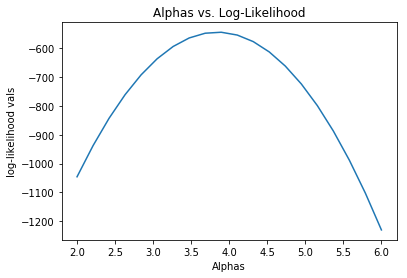

In [22]:
alphas = np.linspace(2, 6, num=20)
T_eq = -0.5
all_results = []

for a in alphas:
    all_results.append(log_likelihood([a,T_eq]))
    
plt.plot(alphas, all_results)
plt.xlabel('Alphas')
plt.ylabel('log-likelihood vals')
plt.title('Alphas vs. Log-Likelihood')
plt.show()

Now explore a range of values around the default of $T_{eq}= -0.5 ^{\circ}$C, while keeping the $\alpha$ parameter constant at its default of 3.4 mm y$^{-1}$. Generate a plot of some test values of $T_{eq}$ against the resulting log-likelihood function values.  Label your axes.

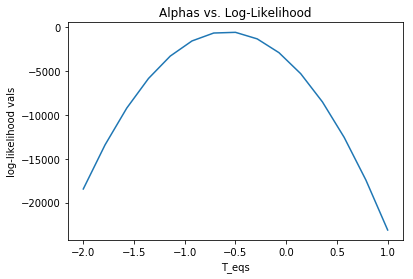

In [23]:
alpha = 3.4
T_eqs = np.linspace(-2, 1, num=15)
tll_results = []

for t in T_eqs:
    tll_results.append(log_likelihood([alpha, t]))
    
plt.plot(T_eqs, tll_results)
plt.xlabel('T_eqs')
plt.ylabel('log-likelihood vals')
plt.title('Alphas vs. Log-Likelihood')
plt.show()

**Reflection 1:** Write a sentence or two commenting on these two plots.  What do you think are the best values for $\alpha$ and $T_{eq}$ (so far)?

###### The best values for $\alpha$ and $T_{eq}$ seem to be ~$4$ and $-0.5$ respectively.


**Reflection 2:** How *likely* do values of $\alpha < 0$  or $T_{eq} > 0$ appear to be?  If these values are implausible, what does that mean in terms of the sea level-temperature system that we are modeling?  You should talk about the actual physical system, not just vague statements like "$\alpha < 0$ looks improbable".  While that statement is true, it is not very insightful.

##### Values of $\alpha < 0$  or $T_{eq} > 0$ seem the be implausible. First, $\alpha$ represents the sensitivity of sea-level changes to changes in global temperature. Having that value be less than zero doesnt make much sense. Also for $T_{eq}$, as that temperature increases, the amount of sea level we will have decreases since a higher temp results in more water being evaporated. 

**Reflection 3:** Based on your plots above, do you think one of hill-climbing or simulated annealing will work better than the other to find the global maximum in the objective function, or does it appear that either will find the optimum?

##### Based on the plots above, both algorithms should work fine to find the global maximum. There is no local maximas that could throw off our algorithms so if they get on the right path, then it should lead both of them to a good estimate of the global max in our obejctive function.

<br>

<a/ id='p1f'></a>

### (1f)  Defining our class structure

That exploration was a nice way to get a sense of how the $\alpha$ and $T_{eq}$ parameters affect the quality of the model output, but it was not particularly rigorous. Let's apply our **hill-climbing** algorithm to this problem.

Using our in-class activity as a guide, do the following:

* Define a `State` class, with attributes for the parameter values (which define the state) and the objective function value of that state.
* Define a `Problem_hillclimb` **sub-class** of the more general class `Problem`, with:
  * attributes for the current `State` (a `State` object), the `objective_function` (the log-likelihood defined above), and `stepsize`. You will need to play around to decide what an appropriate stepsize is. Keep in mind that you may need a different stepsize for each of $\alpha$ and $T_{eq}$.
  * methods for `moves` (return the list of all possible moves from the current state) and `best_move` (return the move that maximizes the objective function).
  * the `moves` available should be in proper 2-dimensional space.  Do **not** simply optimize one parameter, keeping the other fixed, then optimize the other parameter, while keeping the first fixed.  (*That method *can* work, but there are some theoretical issues that would need to be tackled, and we are not getting into that here.*) You are allowed to restrict yourself to movements along a grid, as long as you entertain steps in both the $\alpha$ and the $T_{eq}$ directions.
  * The `Problem` class should have everything in it that you might need to apply different optimization algorithms, while the `Problem_hillclimb` sub-class will have the methods and attributes specific to hill-climbing defined.
* Define the `hill_climb` algorithm, with any necessary modifications (here, and in the above classes) for the new 2-dimensional state space.
  * `hill_climb(problem, n_iter)`:  arguments are a `Problem_hillclimb` object and number of iterations, `n_iter`
  * return a `State` that corresponds to the algorithm's guess at a global maximum

Subject to the above constraints, you may implement these however you would like. **If you do not use a sub-class (properly), you will lose points.** 

In [24]:
class state:
    
    def __init__(self, value, obj_value):
        self.value = (value[0], value[1])
        self.obj_value = obj_value

class Problem:

    # We want to include everything that defines the problem here:
    # - initial state
    # - current state
    # - what is the objective function we're trying to maximize/minimize?
    # - what are the choices of action that we have?
    # - what do we need to know to select our action?
    def __init__(self, initial_state, objective_function, stepsize):
        self.current_state = initial_state
        self.objective_function = objective_function
        self.stepsize_alpha = stepsize[0]
        self.stepsize_T_eq = stepsize[1]
    
class Problem_hillclimb(Problem):
    
    def moves(self):
        poss_moves = []
        poss_moves.append((self.current_state.value[0] + self.stepsize_alpha, self.current_state.value[1] + self.stepsize_T_eq))
        poss_moves.append((self.current_state.value[0] + self.stepsize_alpha, self.current_state.value[1] - self.stepsize_T_eq))
        poss_moves.append((self.current_state.value[0] - self.stepsize_alpha, self.current_state.value[1] + self.stepsize_T_eq))
        poss_moves.append((self.current_state.value[0] - self.stepsize_alpha, self.current_state.value[1] - self.stepsize_T_eq))
        return poss_moves
    
    def best_move(self):
        poss_moves = self.moves()
        #calc objective function value for each possible move
        alpha_index = 0
        t_eq_index = 0
        max_alpha = self.objective_function([poss_moves[0][0], self.current_state.value[1]])
        max_t_eq = self.objective_function([self.current_state.value[0], poss_moves[0][1]])
        
        for i, move in enumerate(poss_moves):
            if max_alpha <= self.objective_function([move[0], self.current_state.value[1]]):
                max_alpha = self.objective_function([move[0], self.current_state.value[1]])
                alpha_index = i
                
            if max_t_eq <= self.objective_function([self.current_state.value[0], move[1]]):
                max_t_eq = self.objective_function([self.current_state.value[0], move[1]])
                t_eq_index = i   
        
        best_alpha = poss_moves[alpha_index][0]
        best_t_eq = poss_moves[t_eq_index][1]
        
        if self.objective_function([self.current_state.value[0], best_t_eq]) <= self.objective_function([best_alpha, self.current_state.value[1]]):
            return best_alpha, self.current_state.value[1]
        else:
            return self.current_state.value[0], best_t_eq

def hill_climb(problem, n_iter):
    
    for t in range(0, n_iter):
        
        move = problem.best_move()
        if problem.current_state.obj_value <= problem.objective_function(move):
            problem.current_state.value = move
            problem.current_state.obj_value = problem.objective_function(problem.current_state.value)
        else:
            return problem.current_state
    return problem.current_state

**Now:**
1. define an initial state object, using the default values from Rahmstorf 2007 as a starting point.
2. define a hill-climbing problem object, using this initial state, the joing log-likelihood objective function, and stepsize(s) of your choosing. (The stepsize(s) may require some playing around to find something you are happy with.)
3. ***hill-climb!!!*** Use a number of iterations that you deem appropriate. 

Play around until you have a simulation that you are happy with.  Then:
1. Print to screen the parameter values and corresponding log-likelihood value.
2. Compare this calibrated log-likelihood value to the "out-of-box" model (above).
3. Make a plot of:
  * the sea level observations as scatter points
  * the uncalibrated model as one line
  * the calibrated model as another line (using a different color!)
  * include axis labels and a legend
  
**"Unit tests":**
* As a benchmark, make sure that your log-likelihood is *at least* -500.
* Your calibrated (optimized) model simulation should be going pretty much straight through the data points.
* Remember to normalize your model against the 1961-1990 reference period.

alpha= 2.599999999999999 T_eq= -0.7400000000000002 likelihood= -472.0609393094394


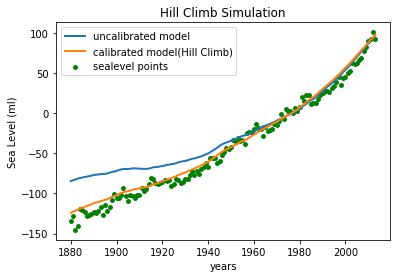

In [25]:
initial_state = state(value=[3.4,-0.5], obj_value=log_likelihood([3.4,-0.5]))

likelihood_problem = Problem_hillclimb(initial_state=initial_state, objective_function=log_likelihood, stepsize=[0.1,0.02])
out = hill_climb(likelihood_problem, n_iter=1000)
print('alpha=', out.value[0], 'T_eq=', out.value[1], 'likelihood=', out.obj_value)

better_slr = slr(out.value[0], out.value[1], temperature)
mean_better_slr = np.mean(better_slr[y1961:y1991])

norm_better_slr = [slr - mean_better_slr for slr in better_slr]


plt.scatter(year, norm_sealevels, color='Green', label='sealevel points', s=15)
plt.plot(year, norm_slr_outputs, label='uncalibrated model', linewidth=2.0)
plt.plot(year, norm_better_slr, label='calibrated model(Hill Climb)', linewidth=2.0)
plt.xlabel('years')
plt.ylabel('Sea Level (ml)')
plt.title('Hill Climb Simulation')
plt.legend()
plt.show()

<br>

<a/ id='p1g'></a>

### (1g)  Simulated annealing

Let's re-calibrate the `slr` model. This time, we will use **simulated annealing**. Again, using our in-class activity as a guide, do the following:

* Continue to use your `State` class above.
* Define a `Problem_annealing` sub-class of the `Problem` class, with:
  * attributes for the current `State` (a `State` object), the `objective_function` (the log-likelihood defined above), and `stepsize`. You will need to play around to decide what an appropriate stepsize is. Keep in mind that you may need a different stepsize for each of $\alpha$ and $T_{eq}$.
  * a method for `random_move`, to pick a random move **by drawing from a multivariate normal distribution**.  You should use the `stepsize` attribute as the covariance (width) for this.
* Define the `simulated_annealing` algorithm, with any necessary modifications (here, and in the above classes) for the new 2-dimensional state space.
  * `simulated_annealing(problem, n_iter)`:  arguments are a `Problem_annealing` object and number of iterations, `n_iter`
  * return a `State` that corresponds to the algorithm's guess at a global maximum, and corresponding objective function value

Subject to the above constraints, you may implement these however you would like.

In [26]:
import time
class Problem_annealing(Problem):
    
    def random_move(self):
        mean = self.current_state.value
        cov = [[self.stepsize_alpha, 0],[0,self.stepsize_T_eq ]]
        move = np.random.multivariate_normal(mean, cov, 1).T
        return [move[0][0], move[1][0]]

    
def schedule(time):
    C = 3
    p = 2
    temperature = C/(time+1)**p
    return temperature

def simulated_annealing(problem, n_iter):
    for t in range(0,n_iter):
        #1. update the "temperature", T(t) = schedule(time)
        temp = schedule(time.clock())
        #2. which moves can we make from the current node?
        #3. pick a random move
        random_move = problem.random_move()
        #4. calculate difference in objective function between
        #   proposed new state and the current state (deltaE)
        deltaE = problem.objective_function(random_move) - problem.current_state.obj_value
        #5. if proposed new state is better than the current state,
        #   then accept the proposed move with probability 1
        if deltaE > 0:
            #accept with prob 1
            problem.current_state.value = random_move
            problem.current_state.obj_value = problem.objective_function(random_move)
        #6. otherwise...
        #        ACCEPT the move with probability exp(-deltaE/T(t)),
        #     or REJECT with prob 1-exp(-deltaE/T(t))
        else:
            p_accept = np.exp(deltaE /temp)
            choices = np.array([[random_move], [problem.current_state.value]])
            idx = np.random.choice(len(choices),1, p=[p_accept, 1-p_accept])
            problem.current_state.value = choices[idx][0][0]
            problem.current_state.obj_value = problem.objective_function(problem.current_state.value)
            
    return problem.current_state
           
  
    
    
    

**Now:**
1. define an initial state object, using the default values from Rahmstorf 2007 as a starting point.
2. define a simulated annealing problem object, using this initial state, the log-likelihood objective function, an appropriate temperature updating schedule and stepsize(s) of your choosing. (The stepsize(s) may require some playing around to find something you are happy with.)
  * note that this "temperature" is distinct from the actual physical temperature used as input to drive the `slr` model
3. ***anneal!!!*** Use a number of iterations that you deem appropriate. 

Play around until you have a simulation that you are happy with.  Then:
1. Print to screen the parameter values and corresponding log-likelihood value.
2. Compare this calibrated log-likelihood value to the "out-of-box" model (above).
3. Make a plot of:
  * the sea level observations as scatter points
  * the uncalibrated model as one line
  * the calibrated model as another line (using a different color!)
  * include axis labels and a legend
  
**"Unit tests":**  How does your model look when you plot it against the data? If it doesn't look good, then you failed this unit test :(

In [27]:
initial_state = state(value=[3.4,-0.5], obj_value=log_likelihood([3.4,-0.5]))

likelihood_problem2 = Problem_annealing(initial_state=initial_state, objective_function=log_likelihood, stepsize=[0.1,0.02])
out2 = simulated_annealing(likelihood_problem2, 1000)
print('alpha=', out2.value[0], 'T_eq=', out2.value[1], 'likelihood=', out2.obj_value)

alpha= 1.865827032529901 T_eq= -0.9935639292721686 likelihood= -462.2429113278681


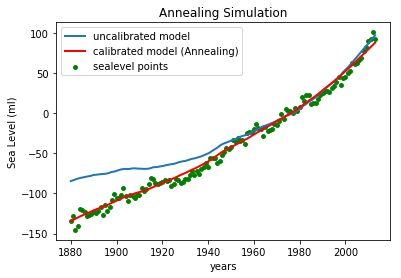

In [28]:
annealing_slr = slr(out2.value[0], out2.value[1], temperature)
mean_annealing_slr = np.mean(annealing_slr[y1961:y1991])

norm_annealing_slr = [slr - mean_annealing_slr for slr in annealing_slr]


plt.scatter(year, norm_sealevels, color='Green', label='sealevel points', s=15)
plt.plot(year, norm_slr_outputs, label='uncalibrated model', linewidth=2.0)
plt.plot(year, norm_annealing_slr, label='calibrated model (Annealing)', color='Red', linewidth=2.0)
plt.xlabel('years')
plt.ylabel('Sea Level (ml)')
plt.title('Annealing Simulation')
plt.legend()
plt.show()

<br>

<a/ id='p1h'></a>

### (1h)  Wrap-up

Consider the values you would choose for $\alpha$ and $T_{eq}$ by only considering their **marginal** effects on the log-likelihood objective function (i.e., your answer to **1e**).  How do those compare to the values for $\alpha$ and $T_{eq}$ that you found above using simulated annealing?  What do you think accounts for the difference?

##### In 1e, the initial values thought to be best for $\alpha$ and $T_{eq}$ were ~ 4  and  −0.5 respectively. The best values using our simulated annealing came out to be ~1.815 for $\alpha$ and -1.017 for $T_{eq}$. To account for the differences, the blame could lie in just the  combination of the two variables. From our plots in 1e, we isolated each variable and guessed what the best values would be given the other variable was a constant. But we are finding the best values for both variables and if they are dependent on each other then this would explain the difference between our guess and simulated results.

<br>

---

<br>

<a id='p2'></a>[Back to top](#top)

## Problem 2:  Playing "intelligent" Tic-Tac-Toe

<img src="https://www.cookieshq.co.uk/images/2016/06/01/tic-tac-toe.png" width="150"/>

<a id='p2a'></a>

### (2a)   Defining the Tic-Tac-Toe class structure

Fill in this class structure for Tic-Tac-Toe using what we did during class as a guide.
* `moves` is a list of tuples to represent which moves are available. Recall that we are using matrix notation for this, where the upper-left corner of the board, for example, is represented at (1,1).
* `result(self, move, state)` returns a ***hypothetical*** resulting `State` object if `move` is made when the game is in the current `state`
* `compute_utility(self, move, state)` calculates the utility of `state` that would result if `move` is made when the game is in the current `state`. This is where you want to check to see if anyone has gotten `nwin` in a row
* `game_over(self, state)` - this wasn't a method, but it should be - it's a piece of code we need to execute repeatedly and giving it a name makes clear what task the piece of code performs. Returns `True` if the game in the given `state` has reached a terminal state, and `False` otherwise.
* `utility(self, state, player)` also wasn't a method earlier, but also should be.  Returns the utility of the current state if the player is X and $-1 \cdot$ utility if the player is O.
* `display(self)` is a method to display the current game `state`, You get it for free! because this would be super frustrating without it.
* `play_game(self, player1, player2)` returns an integer that is the utility of the outcome of the game (+1 if X wins, 0 if draw, -1 if O wins). `player1` and `player2` are functional arguments that we will deal with in parts **2b** and **2d**.

Some notes:
* Assume X always goes first.
* Do **not** hard-code for 3x3 boards.
* You may add attributes and methods to these classes as needed for this problem.

In [29]:
class State:

    def __init__(self, moves):
        self.to_move = 'X'
        self.utility = 0
        self.board = {}
        self.moves = cp.copy(moves)
    
        
class TicTacToe:
    
    def __init__(self, nrow, ncol, nwin):
        assert(nrow == ncol), "must have the same nrows and ncols"
        self.nrow = nrow
        self.ncol = ncol
        self.nwin = nwin
        self.state = State(self.generate_initial(nrow, ncol))
        self.expanded_states = 0
        
    def generate_initial(self, nrow, ncol):
        moves_initial = []
        for m in range(1,nrow+1):
            for n in range(1,ncol+1):
                moves_initial.append((m,n))
        return moves_initial
                 
    def result(self, move, state):
        '''
        What is the hypothetical result of move `move` in state `state` ?
        move  = (row, col) tuple where player will put their mark (X or O)
        state = a `State` object, to represent whose turn it is and form
                the basis for generating a **hypothetical** updated state
                that will result from making the given `move`
        '''
        # First, create a copy of the given state. We use `deepcopy` so
        # that we do not prematurely tamper with the actual current 
        # Tic-Tac-Toe state, since we mostly use this method
        # to get hypothetical results as we search our game tree, not
        # for actual moves.
        new_state = cp.deepcopy(state)
        new_state.board[move] = state.to_move                           
        new_state.moves.remove(move)
        new_state.utility = self.compute_utility(move, state)
        
        new_state.to_move = 'X' if state.to_move=='O' else 'O' 
        return new_state

        
    def compute_utility(self, move, state):
        '''
        What is the utility of making move `move` in state `state`?
        If 'X' wins with this move, return 1;
        if 'O' wins return -1;
        else return 0.
        '''        
        # create a hypothetical copy of the board, with 'move' executed
        board = cp.deepcopy(state.board)
        board[move] = state.to_move
        
        for row in range(1, self.nrow+1):
            row_streak = 0
            for col in range(1, self.ncol+1):
                if board.get((row, col)) == state.to_move:
                    row_streak +=1
                else:
                    row_streak = 0
                if row_streak == self.nwin:
                    return 1 if state.to_move=='X' else -1
        
        for col in range(1, self.ncol+1):
            col_streak = 0
            for row in range(1, self.nrow+1):
                if board.get((row, col)) == state.to_move:
                    col_streak +=1
                else:
                    col_streak = 0
                if col_streak == self.nwin:
                    return 1 if state.to_move=='X' else -1
        
        diag_steak = 0
        for i in range(1, self.nrow+1):
            if board.get((i, i)) == state.to_move:
                diag_steak +=1
            else:
                diag_steak = 0
            if diag_steak == self.nwin:
                return 1 if state.to_move=='X' else -1
        
        rev_diag_steak = 0
        for row in range(self.nrow, 0, -1):
            for col in range(1, self.ncol+1):
                if row + col == self.nwin+1:
                    if board.get((row, col)) == state.to_move:
                        rev_diag_steak +=1
                    if rev_diag_steak == self.nwin:
                        return 1 if state.to_move=='X' else -1
        return 0

        
    def game_over(self, state):
        '''
        Is the game over?  Return True/False.
        The game is over if someone has won (utility!=0)
        or there are no more moves left.
        '''
        if(len(state.moves) == 0) or (state.utility != 0):
            return True
        else:
            return False
        
    
    def utility(self, state, player):
        '''
        Return the value to the given player; 1 for win, -1 for loss, 0 otherwise.
        '''
        if (state.utility == 1 and player == 'X'):
            return 1
        elif (state.utility == 1 and player == 'O'):
            return -1
        elif (state.utility == -1 and player == 'O'):
            return 1
        elif (state.utility == -1 and player == 'X'):
            return -1
        else:
            return 0
        
    def display(self):
        '''Display the current game state.'''
        for row in range(1, self.nrow+1):
            for col in range(1, self.ncol+1):
                print(self.state.board.get((row, col), '.'), end=' ')
            print()

                 
    def play_game(self, player1, player2):
        '''
        Play a game of tic-tac-toe!
        player1 and player2 are function names, either `random_player`
        (see 2b) or `alphabeta_player (see 2d)
        '''
        while not(self.game_over(self.state)):
            if self.state.to_move == 'X':
                player1_move = player1(self)
                self.state = self.result(player1_move, self.state) # player1 moves 
            else:
                player2_move = player2(self)
                self.state = self.result(player2_move, self.state) # player2 makes a move
             
        return self.utility(self.state, 'X')


<br>

<a/ id='p2b'></a>

### (2b) Define a random player

Define a function `random_player` that takes a single argument of the `TicTacToe` class and returns a random move out of the available legal moves in the `state` of the `TicTacToe` game.

In your code for the `play_game` method above, make sure that `random_player` could be a viable input for the `player1` and/or `player2` arguments.

In [30]:
def random_player(game):
    '''A player that chooses a legal move at random out of all
    available legal moves in Tic-Tac-Toe state argument'''
    
    choice = np.random.choice(len(game.state.moves), 1)[0]
    random_move = game.state.moves[choice]
    return random_move

We know from experience and/or because I'm telling you right now that if two `random_player`s play many games of Tic-Tac-Toe against one another, whoever goes first will win about 58% of the time.  **Test your codes and verify** that this is the case by playing at least 1,000 games between two random players. **Report** the proportion of the games that the first player has won, lost, and came to a draw.

**"Unit tests":** If you are wondering how close is close enough to 58%, I simulated 100 tournaments of 1,000 games each. The min-max range of win percentage by the first player was 54-63%.

In [31]:
def report():   
    p1_won = 0
    p1_draw = 0
    p1_loss = 0
    for i in range(0,1000):
        new_game = TicTacToe(3, 3, 3)
        result = new_game.play_game(random_player, random_player)
        if result== 1:
            p1_won +=1
        elif result == -1:
            p1_loss += 1
        else:
            p1_draw += 1    
    return (p1_won/1000) * 100, (p1_draw/1000) * 100, (p1_loss/1000) * 100

win, draw, loss = report()

print('player1 won: '+ str(win) + '%')
print('player1 draw: '+ str(draw)  + '%')
print('player1 lost: '+ str(loss) + '%')

player1 won: 59.0%
player1 draw: 12.6%
player1 lost: 28.4%


In [32]:
# 100 tournaments
for t in range(1,101):
    wins = []
    tp1_won = 0
    for i in range(1,1001):
        new_game = TicTacToe(3, 3, 3)
        new_game.play_game(random_player, random_player)
        player1_score = new_game.utility(new_game.state, 'X')
        player2_score = new_game.utility(new_game.state, 'O')
        if(player1_score > player2_score):
            tp1_won +=1
    wins.append(tp1_won/1000)
    if (t % 10 == 0):
        print(str(t) + 'th tournament')

print('player1 wins on average ' + str(np.mean(wins) * 100) + '% of the time.')

10th tournament
20th tournament
30th tournament
40th tournament
50th tournament
60th tournament
70th tournament
80th tournament
90th tournament
100th tournament
player1 wins on average 57.99999999999999% of the time.


<br>

<a/ id='p2c'></a>

### (2c) What about playing randomly on different-sized boards?

What does the long-term win percentage appear to be for the first player in a 4x4 Tic-Tac-Toe tournament, where 4 marks must be connected for a win?  Support your answer using a simulation and printed output, similar to **2b**.

In [33]:
def fourbyfour():   
    p1_won = 0
    p1_draw = 0
    p1_loss = 0
    for i in range(0,1000):
        new_game = TicTacToe(4, 4, 4)
        result = new_game.play_game(random_player, random_player)
        if result== 1:
            p1_won +=1
        elif result == -1:
            p1_loss += 1
        else:
            p1_draw += 1    
    return (p1_won/1000) * 100, (p1_draw/1000) * 100, (p1_loss/1000) * 100

win, draw, loss = fourbyfour()

print('player1 won: '+ str(win) + '%')
print('player1 draw: '+ str(draw)  + '%')
print('player1 lost: '+ str(loss) + '%')

player1 won: 29.4%
player1 draw: 43.1%
player1 lost: 27.500000000000004%


**Also:** The win percentage should have changed substantially. Did the decrease in wins turn into more losses for the first player or more draws? Write a few sentences explaining the behavior you observed.  *Hint: think about how the size of the state space has changed.*

###### The decrease in wins turned into draws when we changed the board size from a 3x3 to a 4x4. This makes sense because our state space has grown and with moves being chosen at random, it becomes statistically harder to achieve a whole row, column, or diagonal of all 'X's or 'O's

<br>

<a/ id='p2d'></a>

### (2d) Define an alpha-beta player

Alright. Let's finally get serious about our Tic-Tac-Toe game.  No more fooling around!

Craft a function called `alphabeta_player` that takes a single argument of a `TicTacToe` class object and returns the minimax move in the `state` of the `TicTacToe` game. As the name implies, this player should be implementing alpha-beta pruning as described in the textbook and lecture.

Note that your alpha-beta search for the minimax move should include function definitions and alternating recursive calls for `max_value` and `min_value` (see the aggressively realistic pseudocode from the lecture slides).

In your code for the `play_game` method above, make sure that `alphabeta_player` could be a viable input for the `player1` and/or `player2` arguments. Because your `alphabeta_player` is about to mop the floor with your `random_player`!

In [34]:

def alphabeta_player(game):
    return alphabeta_search(game)

def alphabeta_search(game):
    alpha = -np.inf
    beta = +np.inf
    
    func = max_value if game.state.to_move == 'X' else min_value
    value, best_move = func(game, game.state, alpha, beta)
    
    return best_move

def max_value(game, state, alpha, beta):
    if (game.game_over(state)):
        return (state.utility, None)
    value = -np.inf
    best_move = None
    for move in state.moves:
        game.expanded_states += 1
        nextbest = max(value, min_value(game, game.result(move, state), alpha, beta)[0])
        if value != nextbest:
            value = nextbest
            best_move = move
        if value >= beta: #comment this out for states expanded w/out pruning
            best_move = move
            return (value, best_move)
        alpha = max(value, alpha)
    return (alpha, best_move)
    
def min_value(game, state, alpha, beta): 
    if (game.game_over(state)):
        return (state.utility, None)
    value = +np.inf
    best_move = None 
    for move in state.moves:
        game.expanded_states += 1
        nextbest = min(value, max_value(game, game.result(move, state), alpha, beta)[0])
        if value != nextbest:
            value = nextbest
            best_move = move
        if value <= alpha: #comment this out for states expanded w/out pruning
            best_move = move
            return(value, best_move)
        beta = min(value, beta)
    return (beta, best_move)

Verify that your alpha-beta player code is working appropriately through the following tests, using a standard 3x3 Tic-Tac-Toe board. Run **only 30 games for each test**, and report for each test the number of wins, draws and losses for the first player.

1. An alpha-beta player who plays first should never lose to a random player who plays second.
2. A random player who plays first should never win to an alpha-beta player who plays second.
3. Two alpha-beta players should always draw, and should always end up in the same terminal state.

**Nota bene:** Test your code with fewer games between the players to start, because the alpha-beta player will require substantially more compute time than the random player.  This is why I only ask for 30 games, which still might take a couple minutes, depending on your machine. (FYI: 30 games between 2 alpha-beta players on my 2017 MacBook Pro takes about 1 minute.)

In [10]:
def test_1():   
    p1_won = 0
    p1_draw = 0
    p1_loss = 0
    for i in range(0,30):
        new_game = TicTacToe(3, 3, 3)
        result = new_game.play_game(alphabeta_player, random_player)
        if result== 1:
            p1_won +=1
        elif result == -1:
            p1_loss += 1
        else:
            p1_draw += 1    
    return (p1_won/30) * 100, (p1_draw/30) * 100, (p1_loss/30) * 100

win_test1, draw_test1, loss_test1 = test_1()

print('alphabeta as p1 won: '+ str(win_test1) + '%')
print('alphabeta as p1 draw: '+ str(draw_test1)  + '%')
print('alphabeta as p1 lost: '+ str(loss_test1) + '%')

alphabeta as p1 won: 100.0%
alphabeta as p1 draw: 0.0%
alphabeta as p1 lost: 0.0%


In [35]:
def test_2():   
    p2_won = 0
    p2_draw = 0
    p2_loss = 0
    for i in range(0,30):
        new_game = TicTacToe(3, 3, 3)
        result = new_game.play_game(random_player, alphabeta_player)
        if result== -1:
            p2_won +=1
        elif result == 1:
            p2_loss += 1
        else:
            p2_draw += 1    
    return (p2_won/30) * 100, (p2_draw/30) * 100, (p2_loss/30) * 100

win_test2, draw_test2, loss_test2 = test_2()

print('alphabeta as p2 won: '+ str(win_test2) + '%')
print('alphabeta as p2 draw: '+ str(draw_test2)  + '%')
print('alphabeta as p2 lost: '+ str(loss_test2) + '%')

alphabeta as p2 won: 70.0%
alphabeta as p2 draw: 30.0%
alphabeta as p2 lost: 0.0%


In [61]:
def test_3():   
    p1_won = 0
    p1_draw = 0
    p1_loss = 0
    for i in range(0,30):
        new_game = TicTacToe(3, 3, 3)
        result = new_game.play_game(alphabeta_player, alphabeta_player)
        if result== 1:
            p1_won +=1
        elif result == -1:
            p1_loss += 1
        else:
            p1_draw += 1    
    return (p1_won/30) * 100, (p1_draw/30) * 100, (p1_loss/30) * 100

win_test3, draw_test3, loss_test3 = test_3()

print('alphabeta as both players, p1 won: '+ str(win_test3) + '%')
print('alphabeta as both players, draw: '+ str(draw_test3)  + '%')
print('alphabeta as both players, p1 lost:'+ str(loss_test3) + '%')

alphabeta as both players, p1 won: 0.0%
alphabeta as both players, draw: 100.0%
alphabeta as both players, p1 lost:0.0%


<br>

<a/ id='p2e'></a>

### (2e) What has pruning ever done for us?

Calculate the number of number of states expanded by the minimax algorithm, with and without pruning, to determine the minimax decision from the initial empty 3x3 Tic-Tac-Toe board state.  This can be done in many ways, but writing out all the states by hand is **not** one of them (as you will find out!).

Write a sentence or two, commenting on the difference in number of nodes expanded by each search.

In [13]:
prune_game = TicTacToe(3,3,3)
alphabeta_player(prune_game)
print('number of states expanded with pruning:',prune_game.expanded_states)

number of states expanded with pruning: 18296


In [16]:
prune_game = TicTacToe(3,3,3)
alphabeta_player(prune_game)
print('number of states expanded without pruning:',prune_game.expanded_states)

number of states expanded without pruning: 549945


##### Obvisouly, we know that with pruning, less game states will be expanded since we cut off any chance of exploring those states since we know there is no better option down that path. Without pruning, there is an extreme drastic increase in the number of states expanded and I can see why writing them out by hand is NOT one of the ways to go about this problem (:

<br>

---

<br>

<a id='p3'></a>[Back to top](#top)

## Problem 3:  Bayesian sock estimation, rebooted

<img src="https://pbs.twimg.com/media/B0Lbm4TCcAAMH26.jpg" width="200"/>

Let's modify what we did in class (Monday 5 March) so we can estimate the posterior distribution for the number of socks an arbitrary member of our class has, ***given*** the data of unique/paired socks that come out of the dryer.

**The point:** Yes, we know how many socks **each individual** has (because you did the Quizlet, right?). But what we do *not* have is a formal framework in which we can estimate the number of socks ***an arbitrary*** person has (a person selected at random).  Furthermore, we do our laundry multiple times, so we can update our prior beliefs multiple times too, and obtain better estimates of how many socks a mysterious individual has.

**Applications:** Pollsters may know which party *a specific individual* will vote for in an election, but a **LOT** of money is invested in figuring out which party ***an arbitrary*** individual from a community will vote for, given some data.

<br>

<a id='p3a'></a>

### (3a)   Read and plot our class data


1. Read in the data set from Quizlet 8, `data_socks.csv`.  Feel free to steal liberally from the Problem 1 codes.
1. Make a figure with two panels:
  1. A histogram of the CSCI 3202 results for `n_socks`, superimposed with a histogram of some samples from the original negative binomial prior distribution from class using the Karl Broman/blog post parameters.
  1. A histogram of the CSCI 3202 results for `prop_pairs`, superimposed with a histogram of samples from the original beta prior distribution from class.
  
Clearly label all axes and include a legend to distinguish between our class results and the previous prior distributions.

How you present these distributions is up to you.  Be sure the histograms sharing axes are scaled so they both show up!

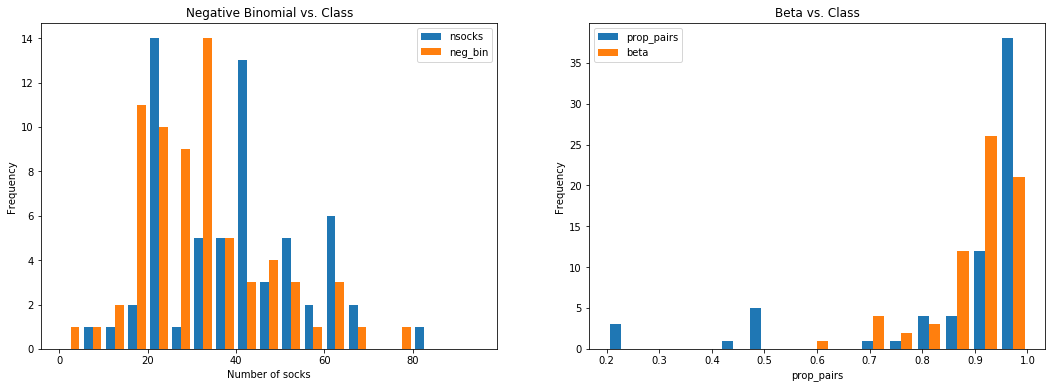

In [47]:
dfSocks = pd.read_csv("hw4_data/data_socks.csv")
nsocks = dfSocks["n_socks"].tolist()
prop_pairs = dfSocks["prop_pairs"].tolist()


prior_mu = 30
prior_sd = 15
prior_size = -prior_mu**2 / (prior_mu - prior_sd**2)
prior_p = 1 - prior_mu**2 / (prior_size * prior_sd**2)

fig = plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.set_size_inches(18, 6)

neg_bin = stats.nbinom.rvs(n=prior_size, p=prior_p, size=69)
ax[0].hist([nsocks,neg_bin], bins=list(range(0,100,5)), label=['nsocks', 'neg_bin'])
ax[0].set_xlabel('Number of socks')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Negative Binomial vs. Class')
ax[0].legend(loc='upper right')

prior_alpha = 18   # Note: this is a bit different from the original blog post.
prior_beta  = 2

# looks at what this prior looks like
beta = stats.beta.rvs(a=prior_alpha, b=prior_beta, size=69)

ax[1].hist([prop_pairs, beta], bins=15, label=['prop_pairs', 'beta'])
ax[1].set_xlabel('prop_pairs')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Beta vs. Class')
ax[1].legend(loc='upper left')

plt.show()

<br>

<a/ id='p3b'></a>

### (3b)  Revising our prior distributions

Decide on new parameters for our two prior distributions, to fit the data from our class.  The way we are formalizing the problem here is also a bit different (total socks, as opposed to just the ones in the laundry, for example), so we would need to adjust anyhow.  You can also decide to use completely new prior distribution forms altogether if you would like.

Clearly state what your new prior distribution parameters are and how you chose them.  Show any relevant calculations.

In [48]:
# new Neg_Bin
new_prior_mu = 25
new_prior_sd = 10
new_prior_size = -new_prior_mu**2 / (new_prior_mu - new_prior_sd**2)
new_prior_p = 1 - new_prior_mu**2 / (new_prior_size * new_prior_sd**2)

new_neg_bin = stats.nbinom.rvs(n=new_prior_size, p=new_prior_p, size=69)


new_prior_alpha = 30   # Note: this is a bit different from the original blog post.
new_prior_beta  = 2

# looks at what this prior looks like
new_beta = stats.beta.rvs(a=new_prior_alpha, b=new_prior_beta, size=69)

Plot the same two-panel figure as in **3a**, but instead of the Karl Broman/blog post prior histograms, include with our CSCI 3202 data your revised prior distributions.

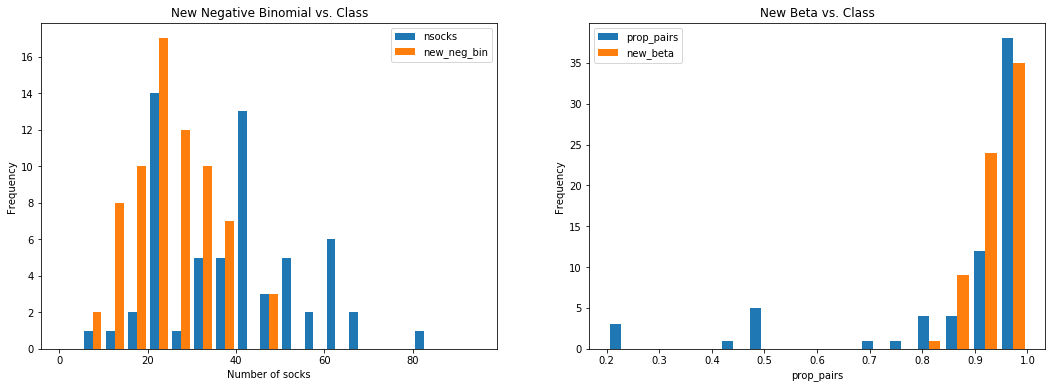

In [49]:
fig = plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.set_size_inches(18, 6)

ax[0].hist([nsocks,new_neg_bin], bins=list(range(0,100,5)), label=['nsocks', 'new_neg_bin'])
ax[0].set_xlabel('Number of socks')
ax[0].set_ylabel('Frequency')
ax[0].set_title('New Negative Binomial vs. Class')
ax[0].legend(loc='upper right')



ax[1].hist([prop_pairs, new_beta], bins=15, label=['prop_pairs', 'new_beta'])
ax[1].set_xlabel('prop_pairs')
ax[1].set_ylabel('Frequency')
ax[1].set_title('New Beta vs. Class')
ax[1].legend(loc='upper left')

plt.show()

<br>

<a/ id='p3c'></a>

### (3c) Do your laundry!

**Now:** Suppose we draw 10 socks out of the laundry and there is one pair and 8 unique socks. Update your prior distributions based on these data.  Use the same **accept/reject likelihood function** form that we used in class. Use at least 10,000 iterations.

In [50]:
nsocks.append(10)
prop_pairs.append(.2)


n_picked = 10     # The number of socks to pick out of the laundry
n_iter = 10000    # The number of iteration to run the sock-drawing simulation

results = []

for k in range(n_iter):
    
    # how many socks do we have? <-- This is a draw from the priors!
    n_socks = int(stats.nbinom.rvs(n=new_prior_size, p=new_prior_p, size=1))
    ppairs = float(stats.beta.rvs(a=new_prior_alpha, b=new_prior_beta, size=1))
    
    # run our model
    unique, num_pairs = sock_model(n_socks=n_socks, prop_pairs=ppairs, n_picked=n_picked)
        
    results.append([unique, num_pairs, n_socks, ppairs])
    

dfSocks = pd.DataFrame(results, columns=['unique', 'pairs', 'n_socks', 'prop_pairs'])

# let's see what this looks like
dfSocks.head()

,unique,pairs,n_socks,prop_pairs
0,6,2,37,0.964600
1,8,1,26,0.914732
2,10,0,39,0.994027
3,2,4,11,0.953841
4,8,1,21,0.975684


Provide a two-panel figure (two rows x one column):
1. Top panel is a histogram of samples from your prior distribution for `n_socks`
1. Bottom panel is a histogram of samples from the posterior distribution resulting from your accept/reject approximate Bayesian computation

Make sure the limits of your horizontal `n_socks`-axis are the same for both panels, to make for an easier comparison, and that all axes are labelled appropriately.

Note that the model `sock_model` from class is defined in the helper functions below.  It should not need modified, but if you want to modify it you can.

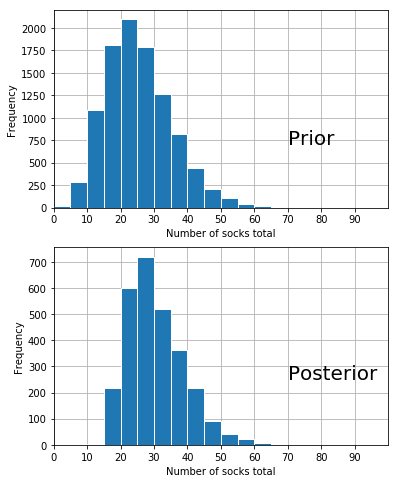

In [51]:
plt.subplots(nrows=2, ncols=1, figsize=(6,8))

plt.subplot(2,1,2)
ax = dfSocks.loc[(dfSocks["unique"]==8) & (dfSocks["pairs"]==1), "n_socks"].hist(
    bins=range(0,70,5), edgecolor="white")
ax.set_axisbelow(True)
plt.xlim([0, 100])
plt.xlabel('Number of socks total')
plt.xticks(range(0,100,10))
plt.ylabel('Frequency')
plt.text(70,250, 'Posterior', size=20)

plt.subplot(2,1,1)
ax = dfSocks["n_socks"].hist(bins=range(0,70,5), edgecolor="white")
ax.set_axisbelow(True)
plt.xlim([0, 100])
plt.xlabel('Number of socks total')
plt.xticks(range(0,100,10))
plt.ylabel('Frequency')
plt.text(70,700, 'Prior', size=20)

plt.show()

Write a few sentences commenting on the effect of the Bayesian update of our prior distribution.  (A "Bayesian update" simply refers to the part where we calculate the likelihood function and use it to modify our prior distribution into our posterior distribution.)

###### The biggest effect that can be seen from the prior distribution to posterior is the horizontal shift. Both distributions obviously still hold their normal distribution look to them.

Save the samples from the prior distributions as lists or in a Pandas data frame. You will use them later.

<br>

<a/ id='p3d'></a>

### (3d) Do your laundry... again!

Now treat your resulting *posterior distributions* as the sample data from our class to develop ***updated prior distributions***.  The easiest way to do this is to assume the same functional form, but update the parameters of the distribution.

Clearly state what your updated prior distributions are and how you decided on these new distributions/parameters. Show any relevant calculations.

##### Since the distributions I have used before are still performing well, Im not going to tweek any of the data. But if I had to, I would make the new mean be the mean of the nsocks array and then find the standard devation for the 2nd param of the normal approximation.

Suppose you do your laundry a second time, again with all of your socks in there at once.  This time, you pull 12 socks out of the laundry and get 3 pairs and 6 distinct socks.

**Now:** Based on our *updated* prior distributions, use the accept/reject likelihood function with these new data to update your priors a second time. Again, use at least 10,000 iterations.

In [52]:
nsocks.append(12)
prop_pairs.append(.5)


n_picked = 12     # The number of socks to pick out of the laundry
n_iter = 10000    # The number of iteration to run the sock-drawing simulation

results2 = []

for k in range(n_iter):
    
    # how many socks do we have? <-- This is a draw from the priors!
    n_socks = int(stats.nbinom.rvs(n=new_prior_size, p=new_prior_p, size=1))
    ppairs = float(stats.beta.rvs(a=new_prior_alpha, b=new_prior_beta, size=1))
    
    # run our model
    unique, num_pairs = sock_model(n_socks=n_socks, prop_pairs=ppairs, n_picked=n_picked)
        
    results2.append([unique, num_pairs, n_socks, ppairs])
    

dfSocks2 = pd.DataFrame(results2, columns=['unique', 'pairs', 'n_socks', 'prop_pairs'])

# let's see what this looks like
dfSocks2.head()

,unique,pairs,n_socks,prop_pairs
0,6,3,17,0.870650
1,8,2,25,0.994700
2,8,2,28,0.953399
3,6,3,19,0.908149
4,6,3,20,0.879931


Provide a three-panel figure (three rows x one column):
1. First two panels are the same as in **3c**
1. Third (bottom) panel is the posterior distribution resulting from the second update

So the top panel is only the prior distribution (no data), the middle panel is a posterior updated once with data and the bottom panel is a posterior distribution updated with two sets of data.

Each update with data is called an **assimilation step** - we are assimilating laundry data.

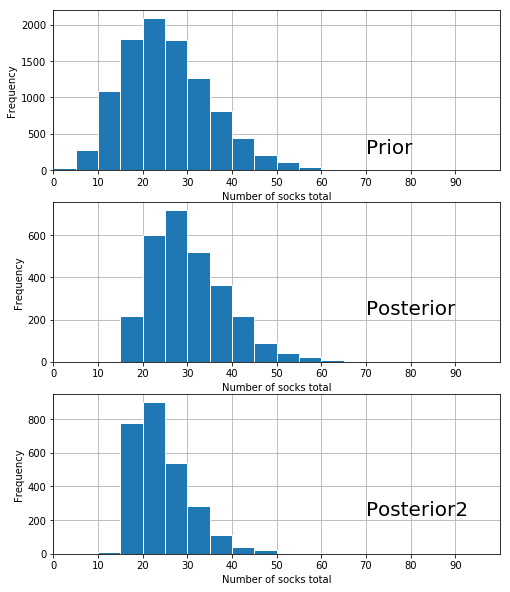

In [53]:
plt.subplots(nrows=3, ncols=1, figsize=(8,10))

plt.subplot(3,1,2)
ax = dfSocks.loc[(dfSocks["unique"]==8) & (dfSocks["pairs"]==1), "n_socks"].hist(
    bins=range(0,70,5), edgecolor="white")
ax.set_axisbelow(True)
plt.xlim([0, 100])
plt.xlabel('Number of socks total')
plt.xticks(range(0,100,10))
plt.ylabel('Frequency')
plt.text(70,225, 'Posterior', size=20)

plt.subplot(3,1,1)
ax = dfSocks["n_socks"].hist(bins=range(0,70,5), edgecolor="white")
ax.set_axisbelow(True)
plt.xlim([0, 100])
plt.xlabel('Number of socks total')
plt.xticks(range(0,100,10))
plt.ylabel('Frequency')
plt.text(70,225, 'Prior', size=20)

plt.subplot(3,1,3)
ax = dfSocks2.loc[(dfSocks2["unique"]==6) & (dfSocks2["pairs"]==3), "n_socks"].hist(
    bins=range(0,70,5), edgecolor="white")
ax.set_axisbelow(True)
plt.xlim([0, 100])
plt.xlabel('Number of socks total')
plt.xticks(range(0,100,10))
plt.ylabel('Frequency')
plt.text(70,225, 'Posterior2', size=20)

plt.show()

<br>

<a/ id='p3e'></a>

### (3e) Some calculations

Calculate the 5-95% percentile (quantile) range for `n_socks` using each of: (1) the prior distribution, (2) the posterior distribution after one update, and (3) the posterior distribution after two updates.  These are called the 90% **credible intervals** in this Bayesian setting, in contrast to the frequentist confidence interval.

In [55]:
print('5th percentile:', np.percentile(dfSocks["n_socks"], 5),  '95th percentile', np.percentile(dfSocks["n_socks"], 95))  #percentile range for 5-95

5th percentile: 11.0 95th percentile 43.0


In [56]:
print('After one update, 5th percentile:',np.percentile(dfSocks.loc[(dfSocks["unique"]==8) & (dfSocks["pairs"]==1), "n_socks"], 5) , '95th percentile' , np.percentile(dfSocks.loc[(dfSocks["unique"]==8) & (dfSocks["pairs"]==1), "n_socks"], 95))   #percentile for 1 update

After one update, 5th percentile: 18.0 95th percentile 46.0


In [57]:
print('After two updates, 5th percentile: ',np.percentile(dfSocks2.loc[(dfSocks2["unique"]==6) & (dfSocks2["pairs"]==3), "n_socks"], 5), '95th percentile',np.percentile(dfSocks2.loc[(dfSocks2["unique"]==6) & (dfSocks2["pairs"]==3), "n_socks"], 95)) #percentile for 2 updates

After two updates, 5th percentile:  16.0 95th percentile 36.0


Write a few sentences commenting on similarities/differences between your original prior distribution (for the class data set), and the two updated posterior distributions, as well as the differences in the estimated credible intervals. Explain why the distributions/credible intervals are changing as they are, as more data are assimilated.

#### The similarities between all three distributions can be seen that they are all approximately normal distributions. The two updated posterior distributions are a bit shortened, especially on the ends of their distributions (smaller variance) but that's because we are limiting the socks drawn and the selected particilar matches of # unique socks and # of pairs.

<br>

**Concluding note:** This only is technically accurate estimation if we assume that all of your socks are in the laundry at the same time. Or if we revise our prior distributions to estimate the number of socks we have in the laundry in any given load. But that's way harder to pin down.

**Also:** Yes, I did wait to post this until after the Quizlet closed so I could include as much sock data as possible.

<br><br><br>

<a id='helpers'></a>

---

[Back to top](#top)

## Some things that might be useful

Easiest way to start:  Click this cell, go to "Cell" in the toolbar above, and click "Run All Below"

In [1]:
import pandas as pd
import numpy as np
import copy as cp
from scipy import stats
from math import floor
import matplotlib.pyplot as plt
from time import time

## Definitely useful

In [2]:
def slr(alpha, Teq, temperature):
    '''sea-level emulator of Rahmstorf 2007 (DOI: 10.1126/science.1135456)
    Takes global mean temperature as forcing, and parameters:
    alpha = temperature sensitivity of sea level rise, and
    Teq   = equilibrium temperature,
    and calculates a rise/fall in sea levels, based on whether the temperature
    is warmer/cooler than the equilibrium temperature Teq.
    Here, we are only worrying about alpha (for now!)'''

    n_time = len(temperature)
    deltat = 1
    sealevel = [0]*n_time
    sealevel[0] = -134
    for t in range(n_time-1):
        sealevel[t+1] = sealevel[t] + deltat*alpha*(temperature[t]-Teq)

    return sealevel


def sock_model(n_socks, prop_pairs, n_picked):
    
    n_pairs = int( floor(n_socks/2) * prop_pairs)
    n_odd = n_socks - 2*n_pairs

    # label all our socks
    socks = []
    for i in range(n_pairs):
        socks = socks + [i]*2
    for j in range(n_pairs, n_pairs+n_odd):
        socks = socks + [j]

    if len(socks)>0:
        # pick our socks out of the dryer
        picked_socks = list(np.random.choice(socks, size=min(n_picked, n_socks), replace=False))
        sock_counts = [picked_socks.count(k) for k in range(max(socks)+1)]

        # how many were singleton socks?
        unique = sock_counts.count(1)

        # how many were in pairs?
        pairs = sock_counts.count(2)
        
    else:
        unique = 0
        pairs = 0
    
    return unique, pairs


[Back to top](#top)